# Applied Machine Learning- Part 3: Evaluation
## 3.1. Classification Evaluation Metrics

In [35]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [36]:
dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [37]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
print('Original labels:', y[1:30])
print('New binary labels:', y_binary_imbalanced[1:30])

Original labels: [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels: [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [38]:
np.bincount(y_binary_imbalanced)              # So, this is imbalance.

array([1615,  182], dtype=int64)

In [39]:
from sklearn.svm import SVC

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### Dummy Classifiers

In [41]:
from sklearn.dummy import DummyClassifier

In [42]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_majority.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

#### The accuracy is high but the prediction is not correct. it is because of imbalanced dataset and using dummy classifier to determine that. So, if the designed classifer accuracy is close to the dummy classifier is sign of:  1- ineffective or missing featrues  2- poor choice of kernel or hyperparameter 3- large class imbalance

### Confusion Matrices
#### Binary (two-class) confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_pred = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print('Most frequent class dummy classifier\n', confusion)

Most frequent class dummy classifier
 [[407   0]
 [ 43   0]]


In [46]:
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_pred = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print('Random class-proportional prediction dummy classifier\n', confusion)

Random class-proportional prediction dummy classifier
 [[363  44]
 [ 34   9]]


In [47]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_pred = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_pred)
print('Support vector machine classifier (linear kernel)\n', confusion)

Support vector machine classifier (linear kernel)
 [[402   5]
 [  5  38]]


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
lr_pred = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_pred)
print('Logistic regression classifier\n', confusion)

Logistic regression classifier
 [[403   4]
 [  7  36]]


In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
dt_pred = dt.predict(X_test)
confusion = confusion_matrix(y_test, dt_pred)
print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Tip: precision (TP/(TP+FP)) is used for minimize false positive, and recall (TP/(TP+FN)) is used for minimize false negative.

### Evaluation metrics for binary classification

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
print('Accuracy = {:.2f}\n Precision = {:.2f}\n Recall = {:.2f}\n F1 = {:.2f}'
      .format(accuracy_score(y_test, dt_pred), precision_score(y_test, dt_pred),
              recall_score(y_test, dt_pred), f1_score(y_test, dt_pred)))

Accuracy = 0.95
 Precision = 0.79
 Recall = 0.60
 F1 = 0.68


In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



### Decision Functions

In [56]:
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))
y_score_list

[(0, -34.626792603600535),
 (0, -18.00573758224968),
 (0, -20.986117116455382),
 (0, -36.81826958114866),
 (0, -39.34135090339136),
 (0, -18.86507181437872),
 (1, 6.004886132137607),
 (0, -32.73125571134504),
 (0, -35.48664562231105),
 (0, -37.358825355291515),
 (0, -25.032663395077627),
 (0, -21.40004835835965),
 (0, -36.51394890658366),
 (0, -15.924305963561842),
 (0, -12.842092090141492),
 (0, -13.72703844013315),
 (1, 14.768474215271596),
 (0, -39.404354059034624),
 (0, -26.108496927111688),
 (0, -28.435068826973243)]

#### Predict probability

In [57]:
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))
y_proba_list

[(0, 9.15746033559592e-16),
 (0, 1.5142846459531758e-08),
 (0, 7.688562328943182e-10),
 (0, 1.0233605889772836e-16),
 (0, 8.208586745826249e-18),
 (0, 6.4121460760535316e-09),
 (1, 0.9975393992833971),
 (0, 6.0953164644699364e-15),
 (0, 3.875659591935529e-16),
 (0, 5.960302445072471e-17),
 (0, 1.3441644965036958e-11),
 (0, 5.082496465387742e-10),
 (0, 1.3873737636150528e-16),
 (0, 1.213840822713767e-07),
 (0, 2.6469706121201397e-06),
 (0, 1.0925025972473892e-06),
 (1, 0.9999996144035964),
 (0, 7.707374631441451e-18),
 (0, 4.58378093312357e-12),
 (0, 4.4751388623982835e-13)]

### Precision-recall Curves

In [58]:
from sklearn.metrics import precision_recall_curve

<IPython.core.display.Javascript object>


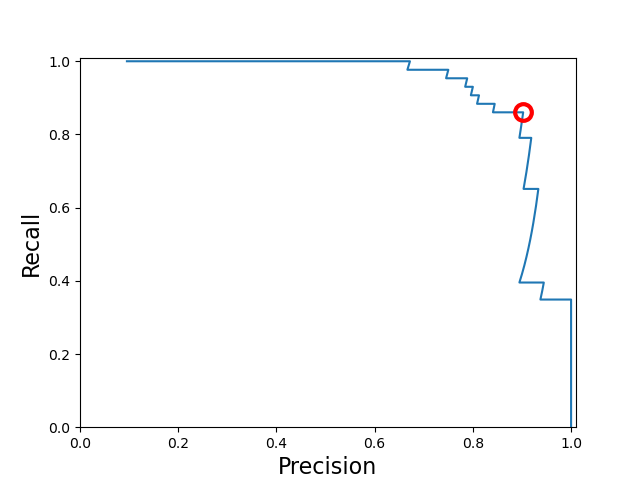

In [59]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()

### ROC Curves, Area-Under-Curve (AUC)

In [60]:
from sklearn.metrics import roc_curve, auc

<IPython.core.display.Javascript object>


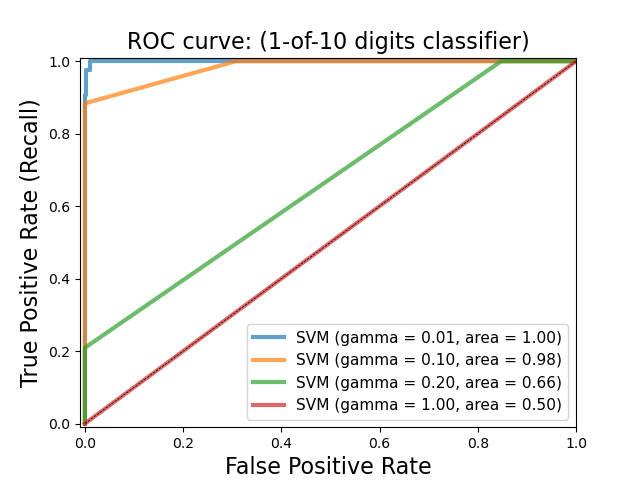

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [61]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.2, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.show()

## Multi-class Classification
### Multi-class confiusion matrix

<IPython.core.display.Javascript object>


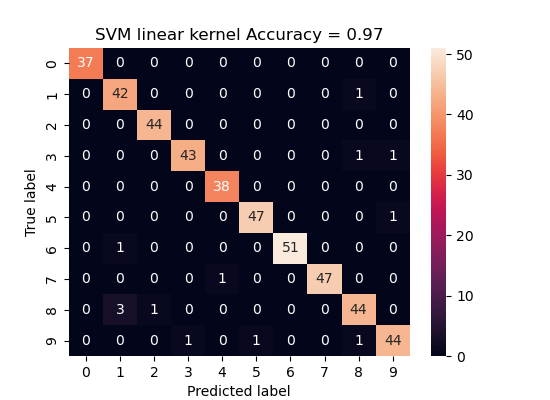

<IPython.core.display.Javascript object>


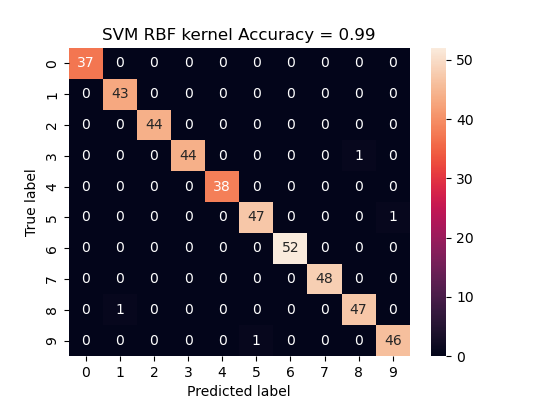

Text(39.47222222222222, 0.5, 'True label')

In [62]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Linear kernel
svm = SVC(kernel='linear').fit(X_train, y_train)
y_pred = svm.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(confusion)

plt.figure(figsize=(5.5,4))
sns.heatmap(df, annot=True)
plt.title('SVM linear kernel Accuracy = {:.2f}'.format(accuracy_score(y_test, y_pred)))
plt.xlabel('Predicted label')
plt.ylabel('True label')

# RBF kernel
svm = SVC(kernel='rbf').fit(X_train, y_train)
y_pred = svm.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(confusion)

plt.figure(figsize=(5.5,4))
sns.heatmap(df, annot=True)
plt.title('SVM RBF kernel Accuracy = {:.2f}'.format(accuracy_score(y_test, y_pred)))
plt.xlabel('Predicted label')
plt.ylabel('True label')

### Multi-class classification report

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Macro average: Each class has equal weight - compute metric within each class then make avg of them
#### Micro average: Each instance has equal weight, so largest classes have most influence - all correct labeled / all (ex. for precision)

## 3.1. Regression Evaluation Metrics

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

Dummy: Mean squared error = 4965.13, r2_score = -0.00
Linear: Mean squared error = 4646.74, r2_score = 0.06


<IPython.core.display.Javascript object>


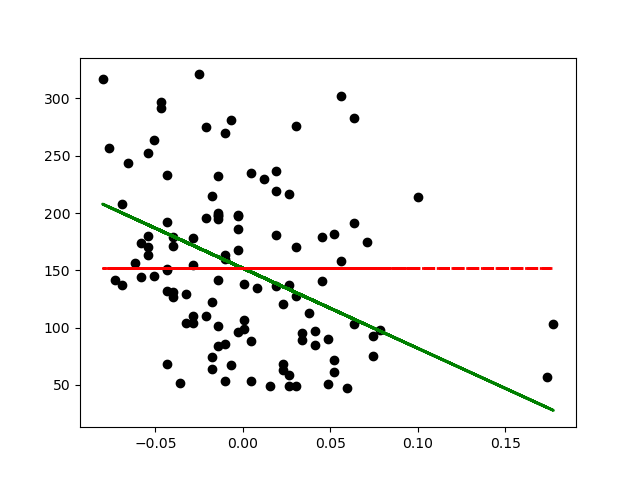

In [72]:
dataset = load_diabetes()
X = dataset.data[:, None, 6]
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
lr_dummy = DummyRegressor(strategy='mean').fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_dummy = lr_dummy.predict(X_test)

print('Dummy: Mean squared error = {:.2f}, r2_score = {:.2f}'
      .format(mean_squared_error(y_test, y_pred_dummy), r2_score(y_test, y_pred_dummy)))
print('Linear: Mean squared error = {:.2f}, r2_score = {:.2f}'
      .format(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)))
plt.figure()
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.plot(X_test, y_pred_dummy, color='red', linestyle='dashed', linewidth=2, label='dummy')
plt.show()

#### Training set for model building, validation set for model selection, and test set for final evaluation